Import pandas, numpy, seaborn, pyplot, and sklearn:

In [309]:
# import pandas, numpy, seaborn, pyplot, and sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Read the merged dataset for use:

In [310]:
# get the merged dataset from our GitHub link so you don't have to upload it to
# a Colab runtime every time you need to run the code
df = pd.read_csv('https://raw.githubusercontent.com/zpenguin19/Intro-to-Data-Science/dd82478db1c91e07e38cd4577cc6f3471813f391/Data%20Science%20Project/Datasets/merged_dataset.csv')

# print the head
df.head()

,Unnamed: 0,Country_Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions,...,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,0,Canada_1992,14.9,7.2,1.7000,80.77,74.49,77.553415,1.360506,775831.0,...,203.785,12.914,2.962,463.521,0.90,1.27,3.33,2.22,5.44,2.05
1,1,Canada_1994,13.6,6.8,1.7000,80.83,74.69,77.685122,1.094332,1332982.0,...,212.180,14.179,3.236,478.267,0.97,1.20,3.42,2.30,5.98,2.08
2,2,Canada_1995,13.1,7.2,1.6695,80.93,74.94,77.861951,0.961245,1865779.0,...,214.874,14.455,3.210,490.951,1.04,1.18,3.50,2.30,6.15,2.09
3,3,Canada_1996,12.6,7.1,1.6390,81.02,75.08,77.977561,0.828159,2589780.0,...,221.514,15.601,3.218,507.000,0.97,1.17,3.50,2.31,6.58,2.10
4,4,Canada_1997,12.0,7.3,1.5920,81.15,75.45,78.230488,1.077165,3497779.0,...,229.521,15.709,3.447,521.278,1.01,1.26,3.46,2.35,6.47,2.15


In [311]:
# print the names of the columns
df.columns

Index(['Unnamed: 0', 'Country_Year', 'Data.Health.Birth Rate',
       'Data.Health.Death Rate', 'Data.Health.Fertility Rate',
       'Data.Health.Life Expectancy at Birth, Female',
       'Data.Health.Life Expectancy at Birth, Male',
       'Data.Health.Life Expectancy at Birth, Total',
       'Data.Health.Population Growth',
       'Data.Infrastructure.Mobile Cellular Subscriptions',
       'Data.Infrastructure.Mobile Cellular Subscriptions per 100 People',
       'Data.Infrastructure.Telephone Lines',
       'Data.Infrastructure.Telephone Lines per 100 People',
       'Data.Rural Development.Agricultural Land',
       'Data.Rural Development.Agricultural Land Percent',
       'Data.Rural Development.Arable Land',
       'Data.Rural Development.Arable Land Percent',
       'Data.Rural Development.Land Area',
       'Data.Rural Development.Rural Population',
       'Data.Rural Development.Rural Population Growth',
       'Data.Rural Development.Surface Area',
       'Data.Urban Develop

# Shortening Variable Names for Readability
The current variable names are understandable, but really long, which is unnecessary. Here, I will shorten the names of each column for simplicity while keeping the meaning the same.

In [312]:
# create a copy of the dataset
df_new = df.copy()

First, I will shorten the names of each of the columns. Then, I will remove columns that I will not need moving forward:
* `Index` is an unneccessary column since it is not an ID
* `CountryCode` is unneccessary as you can get the name of the country from `CountryYear`
* `CH4Emissions` and `N2OEmissions` are unneccesary as I only care about predicting $CO_2$ emissions
* `AgriLandPercent`, `ArableLandPercent`, and `UrbanPopPercent` are unneccesary to me as I only care about the total agricultural, arable, and urban land / population to predict the actual number of kilotons of $CO_2$ emitted
* `CO2CementShare`, `CO2CoalShare`, `CO2GasShare`, `CO2OilShare`, `CO2FlaringShare`, and `CO2TotalShare` are unneccesary to me as I only want to predict the number of kilotons of $CO_2$ a country will produce, not the global percentage (as we do not have data on every single country in the world)

In [313]:
# shorten the names of all columns for easier reading
df_new = df_new.rename(columns={
    'Unnamed: 0': 'Index',
    'Country_Year': 'Country_Year',
    'Data.Health.Birth Rate': 'BirthRate',
    'Data.Health.Death Rate': 'DeathRate',
    'Data.Health.Fertility Rate': 'FertilityRate',
    'Data.Health.Life Expectancy at Birth, Female': 'LifeExpFemale',
    'Data.Health.Life Expectancy at Birth, Male': 'LifeExpMale',
    'Data.Health.Life Expectancy at Birth, Total': 'LifeExpTotal',
    'Data.Health.Population Growth': 'PopGrowth',
    'Data.Infrastructure.Mobile Cellular Subscriptions': 'MobileSubs',
    'Data.Infrastructure.Mobile Cellular Subscriptions per 100 People': 'MobileSubsPer100',
    'Data.Infrastructure.Telephone Lines': 'TelephoneLines',
    'Data.Infrastructure.Telephone Lines per 100 People': 'TelephoneLinesPer100',
    'Data.Rural Development.Agricultural Land': 'AgriLand',
    'Data.Rural Development.Agricultural Land Percent': 'AgriLandPercent',
    'Data.Rural Development.Arable Land': 'ArableLand',
    'Data.Rural Development.Arable Land Percent': 'ArableLandPercent',
    'Data.Rural Development.Land Area': 'LandArea',
    'Data.Rural Development.Rural Population': 'RuralPop',
    'Data.Rural Development.Rural Population Growth': 'RuralPopGrowth',
    'Data.Rural Development.Surface Area': 'SurfaceArea',
    'Data.Urban Development.Population Density': 'PopDensity',
    'Data.Urban Development.Urban Population Percent': 'UrbanPopPercent',
    'Data.Urban Development.Urban Population Percent Growth': 'UrbanPopGrowth',
    'Country.Code': 'CountryCode',
    'Country.GDP': 'GDP',
    'Country.Population': 'CountryPop',
    'Emissions.Production.CH4': 'CH4Emissions',
    'Emissions.Production.N2O': 'N2OEmissions',
    'Emissions.Production.CO2.Cement': 'CO2Cement',
    'Emissions.Production.CO2.Coal': 'CO2Coal',
    'Emissions.Production.CO2.Gas': 'CO2Gas',
    'Emissions.Production.CO2.Oil': 'CO2Oil',
    'Emissions.Production.CO2.Flaring': 'CO2Flaring',
    'Emissions.Production.CO2.Other': 'CO2Other',
    'Emissions.Production.CO2.Total': 'CO2Total',
    'Emissions.Global Share.CO2.Cement': 'CO2CementShare',
    'Emissions.Global Share.CO2.Coal': 'CO2CoalShare',
    'Emissions.Global Share.CO2.Gas': 'CO2GasShare',
    'Emissions.Global Share.CO2.Oil': 'CO2OilShare',
    'Emissions.Global Share.CO2.Flaring': 'CO2FlaringShare',
    'Emissions.Global Share.CO2.Total': 'CO2TotalShare'
})

# remove unneccessary columns
df_new = df_new.drop(columns=['Index', 'CountryCode', "CH4Emissions", "N2OEmissions", "AgriLandPercent", "ArableLandPercent", "UrbanPopPercent", "CO2CementShare", "CO2CoalShare", "CO2GasShare", "CO2OilShare", "CO2FlaringShare", "CO2TotalShare"])

# print the new head
df_new.head()

,Country_Year,BirthRate,DeathRate,FertilityRate,LifeExpFemale,LifeExpMale,LifeExpTotal,PopGrowth,MobileSubs,MobileSubsPer100,...,UrbanPopGrowth,GDP,CountryPop,CO2Cement,CO2Coal,CO2Gas,CO2Oil,CO2Flaring,CO2Other,CO2Total
0,Canada_1992,14.9,7.2,1.7000,80.77,74.49,77.553415,1.360506,775831.0,2.769888,...,1.410113,8.301330e+11,28224410,4.804,106.927,132.129,203.785,12.914,2.962,463.521
1,Canada_1994,13.6,6.8,1.7000,80.83,74.69,77.685122,1.094332,1332982.0,4.648371,...,1.438397,8.955100e+11,28860734,5.769,102.541,140.362,212.180,14.179,3.236,478.267
2,Canada_1995,13.1,7.2,1.6695,80.93,74.94,77.861951,0.961245,1865779.0,6.435665,...,1.300261,9.220930e+11,29164152,6.529,104.352,147.531,214.874,14.455,3.210,490.951
3,Canada_1996,12.6,7.1,1.6390,81.02,75.08,77.977561,0.828159,2589780.0,8.840379,...,1.164742,9.396040e+11,29457820,6.185,106.282,154.200,221.514,15.601,3.218,507.000
4,Canada_1997,12.0,7.3,1.5920,81.15,75.45,78.230488,1.077165,3497779.0,11.822266,...,1.431860,9.825810e+11,29742378,6.657,113.174,152.770,229.521,15.709,3.447,521.278


In [314]:
# print the new column names
df_new.columns

Index(['Country_Year', 'BirthRate', 'DeathRate', 'FertilityRate',
       'LifeExpFemale', 'LifeExpMale', 'LifeExpTotal', 'PopGrowth',
       'MobileSubs', 'MobileSubsPer100', 'TelephoneLines',
       'TelephoneLinesPer100', 'AgriLand', 'ArableLand', 'LandArea',
       'RuralPop', 'RuralPopGrowth', 'SurfaceArea', 'PopDensity',
       'UrbanPopGrowth', 'GDP', 'CountryPop', 'CO2Cement', 'CO2Coal', 'CO2Gas',
       'CO2Oil', 'CO2Flaring', 'CO2Other', 'CO2Total'],
      dtype='object')

# Determining Correlation Between Factors of Development and $CO_2$ Emissions

Before we create a predictive model, we first need to see what variables correlate, and potentially contribute (since, of course, correlation does not necessarily translate to causation) to $CO_2$ emissions in the countries we have data for.

For every potential descriptive variable, we will determine the correlation between it and the total $CO_2$ emissions produced in a given year by a particular country.

Print the names of all countries used in the dataset for reference:

In [315]:
# print the names of all countries used in the dataset, ignoring the year
countries = df_new['Country_Year'].str.split('_').str[0].unique()
countries

array(['Canada', 'Argentina', 'Bolivia', 'Saudi Arabia', 'Spain', 'Oman',
       'Tanzania', 'Gabon', 'New Zealand', 'Albania',
       'United Arab Emirates', 'India', 'Turkey', 'Bangladesh', 'France',
       'Peru', 'Norway', 'Cuba', 'China', 'Germany', 'Indonesia',
       'Colombia', 'Libya', 'Finland', 'Sweden', 'Vietnam', 'Bulgaria',
       'Romania', 'Angola', 'South Africa', 'Austria', 'Japan',
       'United States', 'Brazil', 'Afghanistan', 'Kuwait', 'Ireland',
       'Pakistan', 'Nigeria', 'Ecuador', 'Australia', 'Algeria', 'Chile',
       'Thailand', 'Denmark', 'Philippines', 'Portugal', 'Morocco',
       'Switzerland', 'Iraq', 'Uruguay', 'Cyprus', 'Qatar', 'Italy',
       'Netherlands', 'Israel', 'Malaysia', 'Iceland', 'Poland',
       'Hungary', 'Myanmar', 'Mexico', 'Tunisia', 'United Kingdom',
       'Greece'], dtype=object)

Make a grid of scatterplots between potential explanatory columns and dependent columns for different types of CO2 emissions. For each plot, graph the line of best fit and label the $R^2$ value between each pair of variables.

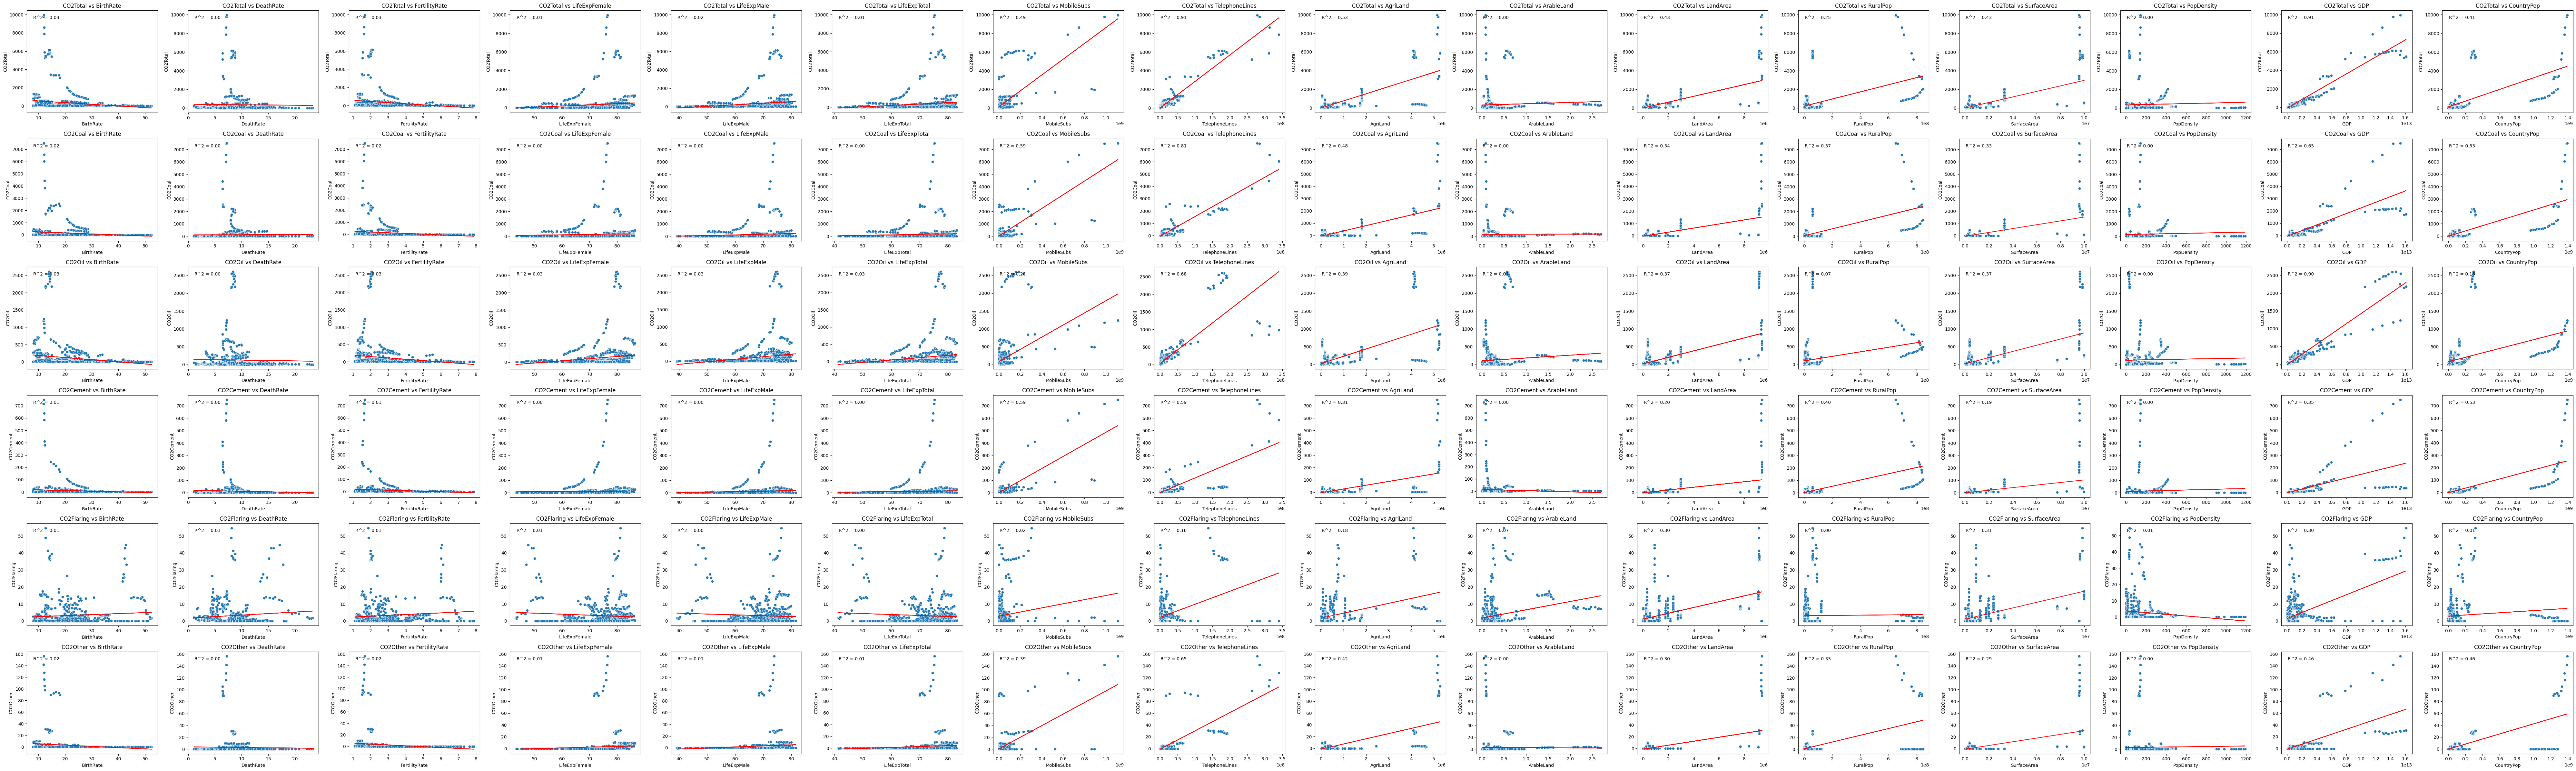

In [316]:
# make a grid of scatterplots between potential explanatory columns and
# dependent CO2 columns
x_cols = ['BirthRate', 'DeathRate', 'FertilityRate', 'LifeExpFemale',
          'LifeExpMale', 'LifeExpTotal', 'MobileSubs', 'TelephoneLines',
          'AgriLand', 'ArableLand', 'LandArea', 'RuralPop', 'SurfaceArea',
          'PopDensity', 'GDP', 'CountryPop']
y_cols = ['CO2Total', 'CO2Coal', 'CO2Oil', 'CO2Cement', 'CO2Flaring', 'CO2Other']

num_x_cols = len(x_cols)
num_y_cols = len(y_cols)

fig, axes = plt.subplots(num_y_cols, num_x_cols, figsize=(5 * num_x_cols, 4 * num_y_cols))

# create an array to store R^2 values for each pair of variables by documenting
# the first variable, the second variable, and the R^2 value once we calculate
# it
r2_values = []

for i, y_col in enumerate(y_cols):
    for j, x_col in enumerate(x_cols):
        ax = axes[i, j] if num_y_cols > 1 else axes[j]
        sns.scatterplot(x=x_col, y=y_col, data=df_new, ax=ax)
        ax.set_title(f'{y_col} vs {x_col}')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)

        # calculate a linear regression using sklearn between the variables in # the plot
        from sklearn.linear_model import LinearRegression
        X = df_new[[x_col]]
        y = df_new[y_col]
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        ax.plot(X, y_pred, color='red')

        # print the R^2 value at the top-left of each plot
        r2 = model.score(X, y)
        ax.text(0.05, 0.95, f'R^2 = {r2:.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')

        # store the R^2 value in the array
        r2_values.append([x_col, y_col, r2])

plt.tight_layout()
plt.show()

In [317]:
# sort the array by highest R^2 value
r2_sorted = sorted(r2_values, key=lambda x: x[2], reverse=True)

# drop values where the second variable is not 'CO2Total'
r2_sorted = [row for row in r2_sorted if row[1] == 'CO2Total']

# print the array with R^2 rounded to 5 digits in the form of a text chart with padding as neccessary
print("R^2 Values:\n")
print("{:<20} {:<20} {:<10}".format("Variable 1", "Variable 2", "R^2"))
print("---------------------------------------------------")
for row in r2_sorted:
    print("{:<20} {:<20} {:<10.5f}".format(row[0], row[1], row[2]))

R^2 Values:

Variable 1           Variable 2           R^2       
---------------------------------------------------
TelephoneLines       CO2Total             0.91089   
GDP                  CO2Total             0.90747   
AgriLand             CO2Total             0.52869   
MobileSubs           CO2Total             0.48573   
LandArea             CO2Total             0.43195   
SurfaceArea          CO2Total             0.42677   
CountryPop           CO2Total             0.40879   
RuralPop             CO2Total             0.24591   
BirthRate            CO2Total             0.02828   
FertilityRate        CO2Total             0.02515   
LifeExpMale          CO2Total             0.01644   
LifeExpTotal         CO2Total             0.01400   
LifeExpFemale        CO2Total             0.01157   
ArableLand           CO2Total             0.00235   
PopDensity           CO2Total             0.00125   
DeathRate            CO2Total             0.00031   


# Linear Regression
Begin to create the model with a simple linear regression. Use all possible explanatory variables to start.

In [318]:
# list of potential explanatory variables
X = df_new[['TelephoneLines', 'GDP', 'MobileSubs', 'CountryPop', 'AgriLand', 'LandArea', 'SurfaceArea', 'RuralPop', 'BirthRate', 'FertilityRate', 'LifeExpMale', 'LifeExpFemale', 'ArableLand', 'PopDensity', 'DeathRate']]

# dependent variable
y = df_new['CO2Total']

In [319]:
# uses same code as Regression notebook from class

# initialize the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split data into training and testing sets (based on a seed so the sets stay
# the same every time the code is run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 56628.81
Intercept: 1312.715219790801
Coefficients: [ 1.45700478e-05  1.73981329e-10 -4.26430734e-08  1.16962583e-06
  1.02462686e-04 -3.22585153e-05  3.54276300e-05 -1.14829693e-06
 -8.68685237e+00 -1.12780997e+00  5.93863166e+00 -1.99439719e+01
 -7.31767604e-01 -2.79612645e-01 -1.56256435e+01]


## Interpretation:


Mean Squared Error (MSE): **56628.81**
* Represents the average squared difference between the actual number of kilotons of $CO_2$ emitted in a particular country during a single given year (`CO2Total`) and the predicted number of kilotons from the linear regression model

Intercept: 30.2467
* The predicted number of kilotons of $CO_2$ emitted in a particular country during a single given year (`CO2Total`) when all the explanatory variables are zero

Slope Coefficients:
* Represent the change in the predicted number of kilotons of $CO_2$ emitted for a one-unit change in the corresponding independent variable, holding all other variables constant
    * For example, the coefficient for "RM" (average number of rooms) is positive (2.7844). This means that for each additional room in a house, the predicted median house price increases by approximately 2.78 thousand dollars (or 2780 dollars), keeping all other variables constant.
    * `1.45700478e-05` - for every increase of 100,000 telephone lines, the expected $CO_2$ emissions increases by about 1.457 kilotons
    * `1.73981329e-10` - for every increase of <span style="white-space: nowrap;">$10 billion</span> in GDP, the expected $CO_2$ emissions increases by about 1.740 kilotons
    * `-4.26430734e-08`- for every increase of 100 million cell phone subscriptions, the expected $CO_2$ emissions decreases by about 4.264 kilotons
    * `1.16962583e-06` - for every 1 million people added to the population, the expected $CO_2$ emissions increases by about 1.170 kilotons
    * etc.

# Stepwise Regression
Try the stepwise regression technique using code from the Google Colab notebook provided in class.

In [320]:
# stepwise regression on same data
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
sfs_step = sfs(lreg, k_features=6, forward=True, floating= True, verbose=2, scoring='r2', cv= 5)
sfs_step = sfs_step.fit(X_train, y_train)


[2025-04-13 15:45:24] Features: 1/6 -- score: 0.875172297821341
[2025-04-13 15:45:25] Features: 2/6 -- score: 0.8942648361727004
[2025-04-13 15:45:25] Features: 3/6 -- score: 0.9151729322803493
[2025-04-13 15:45:25] Features: 4/6 -- score: 0.9242510415861153
[2025-04-13 15:45:25] Features: 5/6 -- score: 0.926964791587767
[2025-04-13 15:45:26] Features: 6/6 -- score: 0.9284653271423696

In [321]:
# print features that were included in the model
feat_names_step = list(sfs_step.k_feature_names_)
print(feat_names_step)

['TelephoneLines', 'GDP', 'AgriLand', 'RuralPop', 'ArableLand', 'PopDensity']


In [322]:
# uses same code as Regression notebook from class

# create a dataframe with only the selected columns
selected_columns = feat_names_step
df_selected = df_new[selected_columns]

# split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)

# fit a linear regression model using the selected features
reg = LinearRegression()
reg.fit(X_train, y_train)

# make predictions using the test set
y_pred = reg.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# print the coefficients
print(f"Intercept: {reg.intercept_}")
print(f"Slope: {reg.coef_}")

Mean Squared Error: 62791.787932388404
Intercept: -51.93797015844251
Slope: [ 1.50422316e-05  1.81324412e-10  1.11506486e-04  6.88647315e-07
  2.34018383e-05 -2.99827793e-01]


I chose to use the 6 most important variables in the regression model. Print the names of these variables below for future reference:

In [323]:
# print the columns that will be used in the model
selected_columns

['TelephoneLines', 'GDP', 'AgriLand', 'RuralPop', 'ArableLand', 'PopDensity']

# Predict Explanatory Variables
Now that we have a regression model to predict $CO_2$ emissions for a particular country during a year in the future, we need to estimate each of the explanatory variables for a particular country for a year in the future.

We are using the model created by the stepwise regression method, so we can drop any column that isn't one of the following:
* `CountryYear` - the row ID
* `TelephoneLines` - explanatory variable
* `GDP` - explanatory variable
* `AgriLand` - explanatory variable
* `RuralPop` - explanatory variable
* `ArableLand` - explanatory variable
* `PopDensity` - explanatory variable
* `CO2Total` - dependent variable

In [324]:
# make a copy of the new dataframe to store the smaller dataset
df_smaller = df_new.copy()

# drop any column that isn't one of the ones mentioned above
df_smaller = df_smaller.drop(columns=['PopGrowth', 'BirthRate', 'DeathRate', 'FertilityRate', 'LifeExpFemale', 'LifeExpMale', 'LifeExpTotal', 'MobileSubs', 'LandArea', 'SurfaceArea', 'CountryPop', 'MobileSubsPer100', 'TelephoneLinesPer100', 'CO2Cement', 'CO2Coal', 'CO2Gas', 'CO2Oil', 'CO2Flaring', 'CO2Other', 'RuralPopGrowth', 'UrbanPopGrowth'])

# print the head
df_smaller.head()

,Country_Year,TelephoneLines,AgriLand,ArableLand,RuralPop,PopDensity,GDP,CO2Total
0,Canada_1992,15814928.0,677530.0,1.617582,6586539,3.097999,8.301330e+11,463.521
1,Canada_1994,16716802.0,678740.0,1.579869,6587858,3.170768,8.955100e+11,478.267
2,Canada_1995,17250407.0,679340.0,1.564480,6575215,3.201394,9.220930e+11,490.951
3,Canada_1996,17567000.0,679940.0,1.551305,6553280,3.228016,9.396040e+11,507.000
4,Canada_1997,17974000.0,680550.0,1.534415,6542357,3.262975,9.825810e+11,521.278


Now that we have only the columns we need, we will create a variable to select a country from the dataset and drop all rows that are not from that country. This will work for any country in the dataset by simply changing the `country` variable.

In [325]:
# this should work for any country by changing the name of the country variable
country = 'Canada'

# create a copy of the smaller dataset to represent the single country
df_country = df_smaller.copy()

# drop all rows that are not from the country
df_country = df_country.drop(df_country[df_country['Country_Year'].str.split('_').str[0] != country].index)

# since now we only have one country in the dataset, change the 'Country_Year'
# column to just 'Year' and remove the name of the country
df_country['Country_Year'] = df_country['Country_Year'].str.split('_').str[1]

# rename 'Country_Year' to just 'Year'
df_country = df_country.rename(columns={'Country_Year': 'Year'})

# convert the 'Year' column to an integer
df_country['Year'] = df_country['Year'].astype(int)

# print the head
df_country

,Year,TelephoneLines,AgriLand,ArableLand,RuralPop,PopDensity,GDP,CO2Total
0,1992,15814928.0,677530.0,1.617582,6586539,3.097999,8.301330e+11,463.521
1,1994,16716802.0,678740.0,1.579869,6587858,3.170768,8.955100e+11,478.267
2,1995,17250407.0,679340.0,1.564480,6575215,3.201394,9.220930e+11,490.951
3,1996,17567000.0,679940.0,1.551305,6553280,3.228016,9.396040e+11,507.000
4,1997,17974000.0,680550.0,1.534415,6542357,3.262975,9.825810e+11,521.278
5,1998,18660000.0,679440.0,1.520615,6495228,3.297649,1.023600e+12,528.987
6,1999,19294000.0,678340.0,1.509824,6435543,3.326317,1.079500e+12,543.730
7,2000,20380000.0,677230.0,1.499679,6373418,3.353952,1.138680e+12,566.552
8,2001,20840000.0,676130.0,1.488802,6314558,3.383699,1.162070e+12,559.042
9,2002,21126000.0,675020.0,1.476100,6275436,3.418031,1.200470e+12,564.669


Given all the data provided for the country, we will determine a line of best fit for each of the explanatory variables, then extrapolate to predict the value of each explanatory variable for a particular country in a future year. This should work for any future year by changing the `year` variable.

In [410]:
# select a year in the future to predict data for
year = 2020

# create a list to store predicted values for all explanatory variables
predicted = []

## TelephoneLines

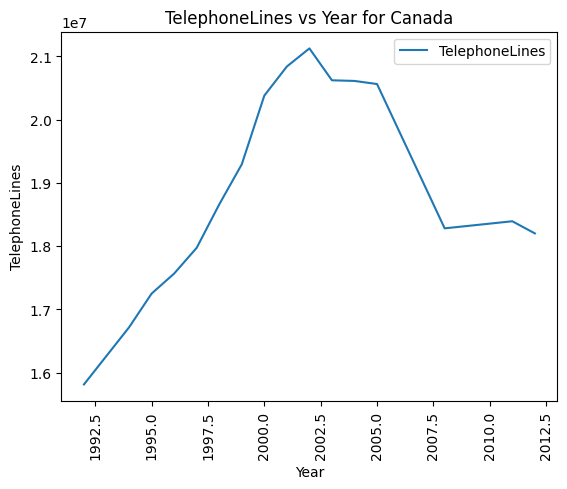

In [411]:
# create a variable for the explanatory variable we are currently modeling
explanatory = 'TelephoneLines'

# make a line graph of year vs TelephoneLines for the country
plt.plot(df_country['Year'], df_country[explanatory], label=explanatory)
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# create a list to store r^2 values for each type of regression as well as the
# equation given by each to see which best fits
r2_values = []

### Linear

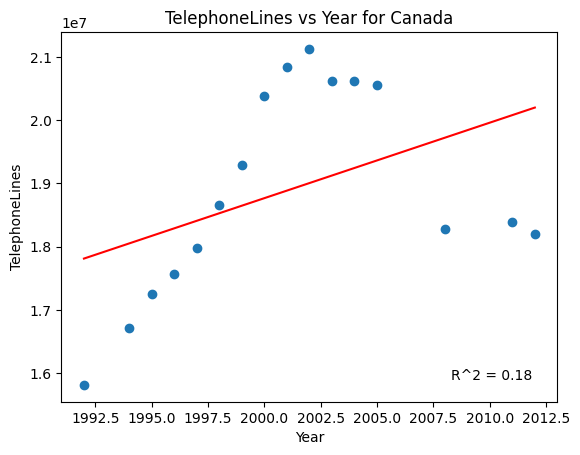

y = -219907238.64091182 + 119337.03911218x


In [413]:
# try a linear regression between Year and TelephoneLines to see if it fits
from sklearn.linear_model import LinearRegression
X = df_country[['Year']]
y = df_country[explanatory]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# linear regression
r2 = model.score(X, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[0]:.8f}x'
r2_values.append([explanatory, 'Linear', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Quadratic

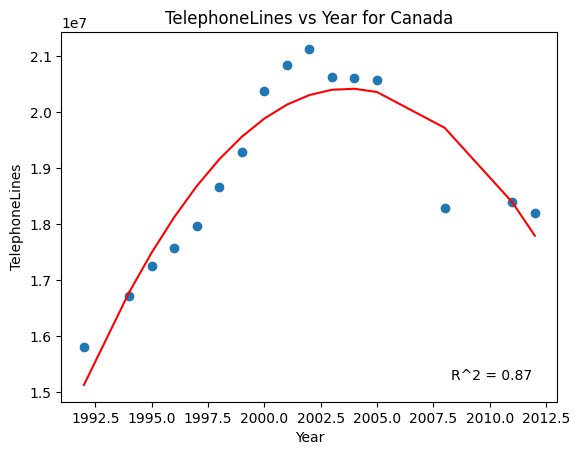

y = -154191394739.38986206 + 153924547.27055404x + -38409.45x^2


In [414]:
# try a quadratic regression between Year and TelephoneLines to see if it fits
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# quadratic regression
r2 = model.score(X_poly, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[1]:.8f}x + {model.coef_[2]:.2f}x^2'
r2_values.append([explanatory, 'Quadratic', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Exponential

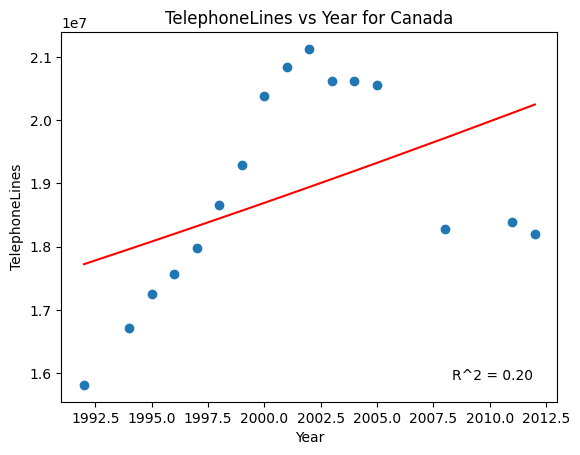

y = 30.79135957 * e^(0.00665821x)


In [415]:
# try an exponential regression between Year and TelephoneLines to see if it
# fits
log_y = np.log(y)
model = LinearRegression().fit(X, log_y)
log_y_pred = model.predict(X)
y_pred = np.exp(log_y_pred)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# exponential regression
r2 = model.score(X, log_y)
a = np.exp(model.intercept_)
b = model.coef_[0]
equation = f'y = {a:.8f} * e^({b:.8f}x)'
r2_values.append([explanatory, 'Exponential', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

Pick which of either linear, quadratic, or exponential has the best fit.

In [416]:
# out of all the models so far, determine which fits the best and use that
# equation to predict the value of TelephoneLines in the given country in the
# chosen year
r2_values = sorted(r2_values, key=lambda x: x[2], reverse=True)
best_fit = r2_values[0]

# print the name of the model that fit the best, the r^2 value, and the
# equation for the model
print("Model: " + best_fit[1])
print("R^2 Value: " + str(best_fit[2]))
print("Equation: " + best_fit[3])

# get the equation from the best fit model
best_equation = best_fit[3]

Model: Quadratic
R^2 Value: 0.8659329567944669
Equation: y = -154191394739.38986206 + 153924547.27055404x + -38409.45x^2


In [417]:
# use the equation and replace 'x' with the year to predict the explanatory
# variable
def predict_value(year, equation):
# this should work for all explanatory values

    # quadratic
    if "x^2" in equation:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        coef_x2 = float(coeffs[2].strip().split("x^2")[0])
        predicted_val = intercept + coef_x * year + coef_x2 * year**2

    # exponential
    elif "e^" in equation:
        parts = equation.split("=")
        rhs = parts[1].split("*")
        a = float(rhs[0].strip())
        b_part = rhs[1].split("e^")
        b = float(b_part[1].replace("(", "").replace(")", "").strip())
        predicted_val = a * np.exp(b * year)

    # linear
    else:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        predicted_val = intercept + coef_x * year

    return predicted_val

predicted_val = predict_value(year, best_equation)
print(f"Predicted {explanatory} for {country} in {year}: {predicted_val}")

# add the predicted value for the explanatory variable to the list as long as
# it isn't already on the list
if [country, year, explanatory, predicted_val] not in predicted:
    predicted.append([country, year, explanatory, predicted_val])

Predicted TelephoneLines for Canada in 2020: 10270967.129302979


## AgriLand

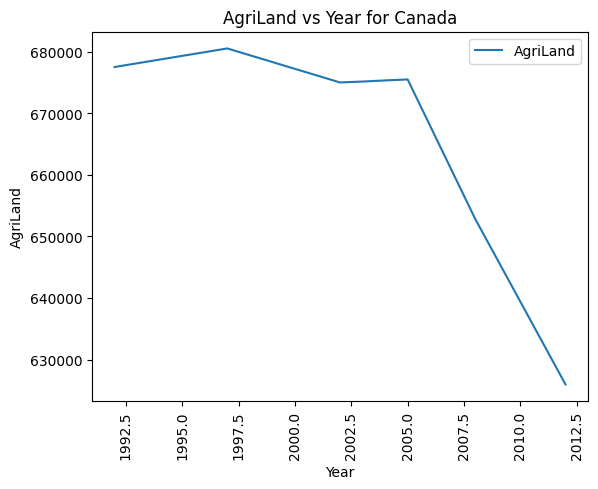

In [418]:
# create a variable for the explanatory variable we are currently modeling
explanatory = 'AgriLand'

# make a line graph of year vs AgriLand for the country
plt.plot(df_country['Year'], df_country[explanatory], label=explanatory)
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# create a list to store r^2 values for each type of regression as well as the
# equation given by each to see which best fits
r2_values = []

### Linear

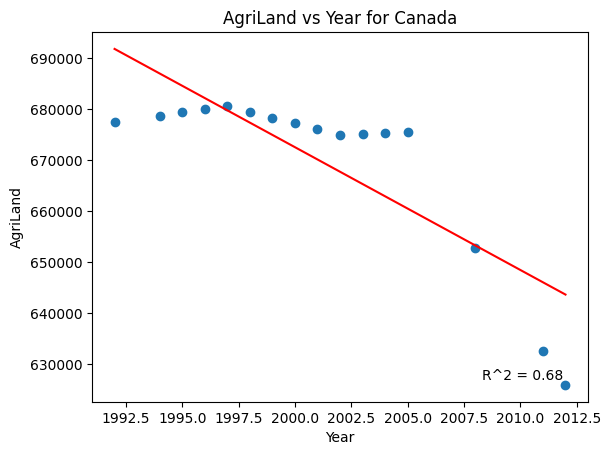

y = 5484472.85710858 + -2405.96544691x


In [419]:
# try a linear regression between Year and AgriLand to see if it fits
from sklearn.linear_model import LinearRegression
X = df_country[['Year']]
y = df_country[explanatory]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# linear regression
r2 = model.score(X, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[0]:.8f}x'
r2_values.append([explanatory, 'Linear', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Quadratic

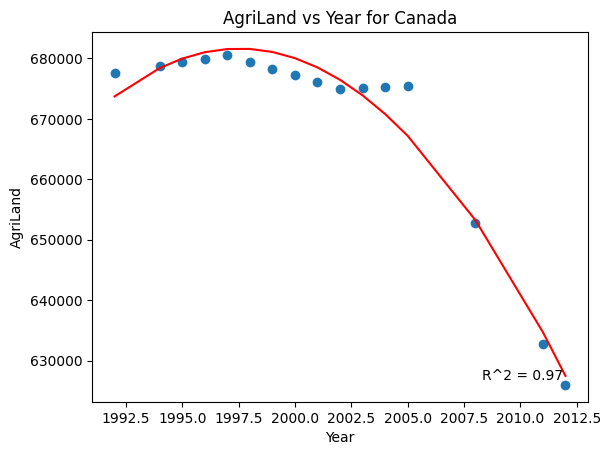

y = -1032034143.36176562 + 1033992.21110459x + -258.81755411x^2


In [420]:
# try a quadratic regression between Year and AgriLand to see if it fits
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# quadratic regression
r2 = model.score(X_poly, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[1]:.8f}x + {model.coef_[2]:.8f}x^2'
r2_values.append([explanatory, 'Quadratic', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Exponential

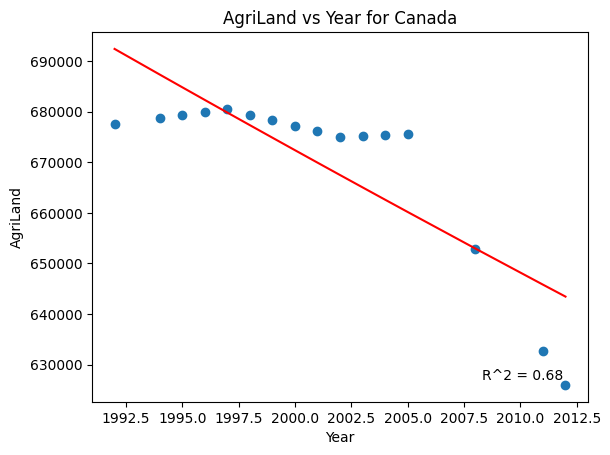

y = 1031450222.61091256 * e^(-0.00366782x)


In [408]:
# try an exponential regression between Year and AgriLand to see if it
# fits
log_y = np.log(y)
model = LinearRegression().fit(X, log_y)
log_y_pred = model.predict(X)
y_pred = np.exp(log_y_pred)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# exponential regression
r2 = model.score(X, log_y)
a = np.exp(model.intercept_)
b = model.coef_[0]
equation = f'y = {a:.8f} * e^({b:.8f}x)'
r2_values.append([explanatory, 'Exponential', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

Pick which of either linear, quadratic, or exponential has the best fit.

In [421]:
# out of all the models so far, determine which fits the best and use that
# equation to predict the value of AgriLand in the given country in the
# chosen year
r2_values = sorted(r2_values, key=lambda x: x[2], reverse=True)
best_fit = r2_values[0]

# print the name of the model that fit the best, the r^2 value, and the
# equation for the model
print("Model: " + best_fit[1])
print("R^2 Value: " + str(best_fit[2]))
print("Equation: " + best_fit[3])

# get the equation from the best fit model
best_equation = best_fit[3]

Model: Quadratic
R^2 Value: 0.9676391226422615
Equation: y = -1032034143.36176562 + 1033992.21110459x + -258.81755411x^2


In [422]:
# use the equation and replace 'x' with the year to predict the explanatory
# variable
def predict_value(year, equation):
# this should work for all explanatory values

    # quadratic
    if "x^2" in equation:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        coef_x2 = float(coeffs[2].strip().split("x^2")[0])
        predicted_val = intercept + coef_x * year + coef_x2 * year**2

    # exponential
    elif "e^" in equation:
        parts = equation.split("=")
        rhs = parts[1].split("*")
        a = float(rhs[0].strip())
        b_part = rhs[1].split("e^")
        b = float(b_part[1].replace("(", "").replace(")", "").strip())
        predicted_val = a * np.exp(b * year)

    # linear
    else:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        predicted_val = intercept + coef_x * year

    return predicted_val

predicted_val = predict_value(year, best_equation)
print(f"Predicted {explanatory} for {country} in {year}: {predicted_val}")

# add the predicted value for the explanatory variable to the list as long as
# it isn't already on the list
if [country, year, explanatory, predicted_val] not in predicted:
    predicted.append([country, year, explanatory, predicted_val])

Predicted AgriLand for Canada in 2020: 550975.2790621519


## ArableLand

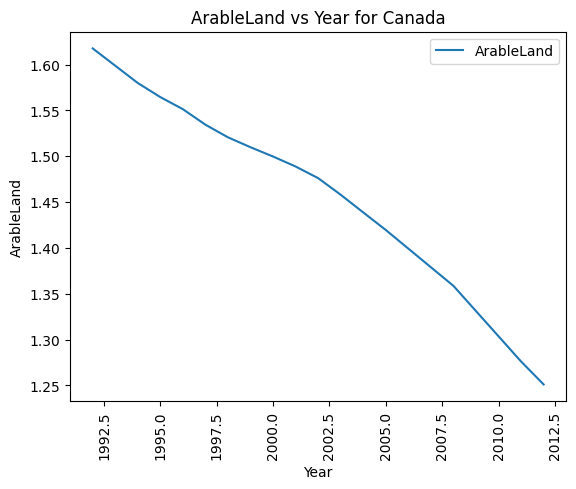

In [423]:
# create a variable for the explanatory variable we are currently modeling
explanatory = 'ArableLand'

# make a line graph of year vs ArableLand for the country
plt.plot(df_country['Year'], df_country[explanatory], label=explanatory)
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# create a list to store r^2 values for each type of regression as well as the
# equation given by each to see which best fits
r2_values = []

### Linear

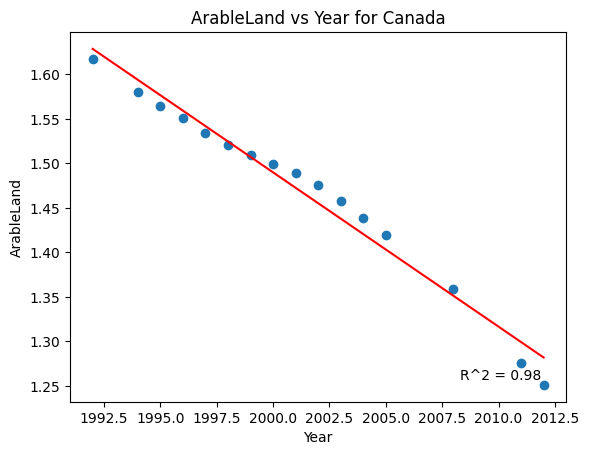

y = 36.15652191 + -0.01733327x


In [424]:
# try a linear regression between Year and ArableLand to see if it fits
from sklearn.linear_model import LinearRegression
X = df_country[['Year']]
y = df_country[explanatory]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# linear regression
r2 = model.score(X, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[0]:.8f}x'
r2_values.append([explanatory, 'Linear', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Quadratic

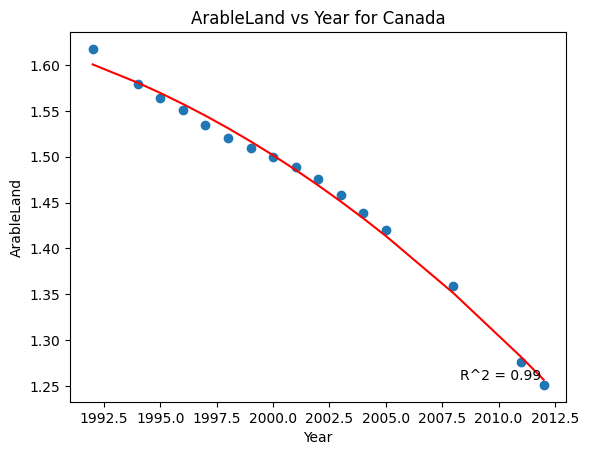

y = -1570.15846440 + 1.58724702x + -0.00040071x^2


In [425]:
# try a quadratic regression between Year and ArableLand to see if it fits
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# quadratic regression
r2 = model.score(X_poly, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[1]:.8f}x + {model.coef_[2]:.8f}x^2'
r2_values.append([explanatory, 'Quadratic', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Exponential

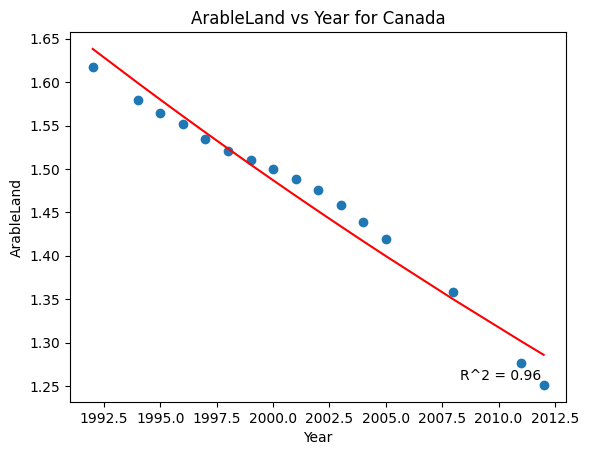

y = 49089067640.21940613 * e^(-0.01211007x)


In [426]:
# try an exponential regression between Year and ArableLand to see if it
# fits
log_y = np.log(y)
model = LinearRegression().fit(X, log_y)
log_y_pred = model.predict(X)
y_pred = np.exp(log_y_pred)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# exponential regression
r2 = model.score(X, log_y)
a = np.exp(model.intercept_)
b = model.coef_[0]
equation = f'y = {a:.8f} * e^({b:.8f}x)'
r2_values.append([explanatory, 'Exponential', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

Pick which of either linear, quadratic, or exponential has the best fit.

In [427]:
# out of all the models so far, determine which fits the best and use that
# equation to predict the value of ArableLand in the given country in the
# chosen year
r2_values = sorted(r2_values, key=lambda x: x[2], reverse=True)
best_fit = r2_values[0]

# print the name of the model that fit the best, the r^2 value, and the
# equation for the model
print("Model: " + best_fit[1])
print("R^2 Value: " + str(best_fit[2]))
print("Equation: " + best_fit[3])

# get the equation from the best fit model
best_equation = best_fit[3]

Model: Quadratic
R^2 Value: 0.9942800276132064
Equation: y = -1570.15846440 + 1.58724702x + -0.00040071x^2


In [428]:
# use the equation and replace 'x' with the year to predict the explanatory
# variable
def predict_value(year, equation):
# this should work for all explanatory values

    # quadratic
    if "x^2" in equation:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        coef_x2 = float(coeffs[2].strip().split("x^2")[0])
        predicted_val = intercept + coef_x * year + coef_x2 * year**2

    # exponential
    elif "e^" in equation:
        parts = equation.split("=")
        rhs = parts[1].split("*")
        a = float(rhs[0].strip())
        b_part = rhs[1].split("e^")
        b = float(b_part[1].replace("(", "").replace(")", "").strip())
        predicted_val = a * np.exp(b * year)

    # linear
    else:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        predicted_val = intercept + coef_x * year

    return predicted_val

predicted_val = predict_value(year, best_equation)
print(f"Predicted {explanatory} for {country} in {year}: {predicted_val}")

# add the predicted value for the explanatory variable to the list as long as
# it isn't already on the list
if [country, year, explanatory, predicted_val] not in predicted:
    predicted.append([country, year, explanatory, predicted_val])

Predicted ArableLand for Canada in 2020: 1.0234320000001844


## RuralPop

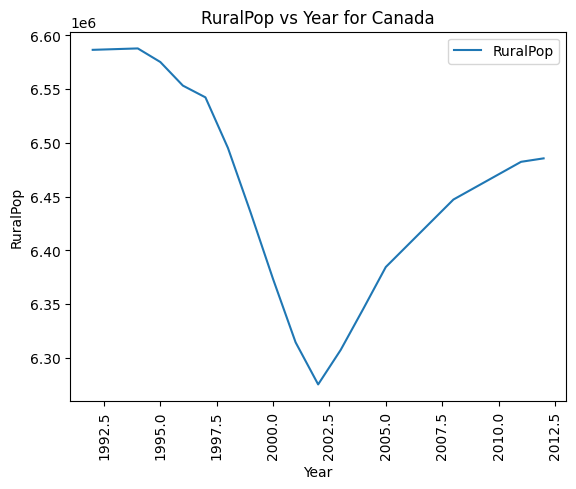

In [429]:
# create a variable for the explanatory variable we are currently modeling
explanatory = 'RuralPop'

# make a line graph of year vs TelephoneLines for the country
plt.plot(df_country['Year'], df_country[explanatory], label=explanatory)
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# create a list to store r^2 values for each type of regression as well as the
# equation given by each to see which best fits
r2_values = []

### Linear

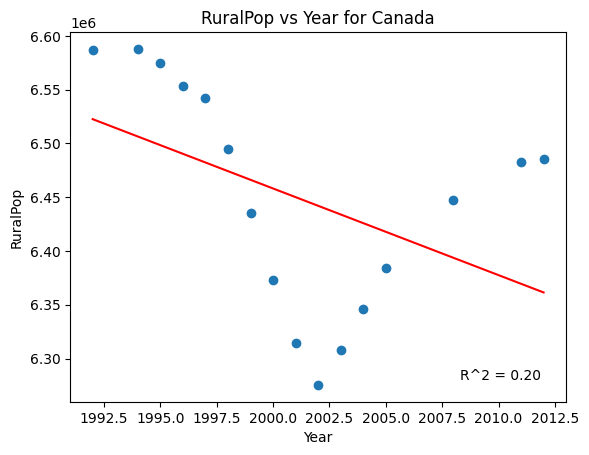

y = 22572054.41763648 + -8056.97756449x


In [430]:
# try a linear regression between Year and RuralPop to see if it fits
from sklearn.linear_model import LinearRegression
X = df_country[['Year']]
y = df_country[explanatory]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# linear regression
r2 = model.score(X, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[0]:.8f}x'
r2_values.append([explanatory, 'Linear', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Quadratic

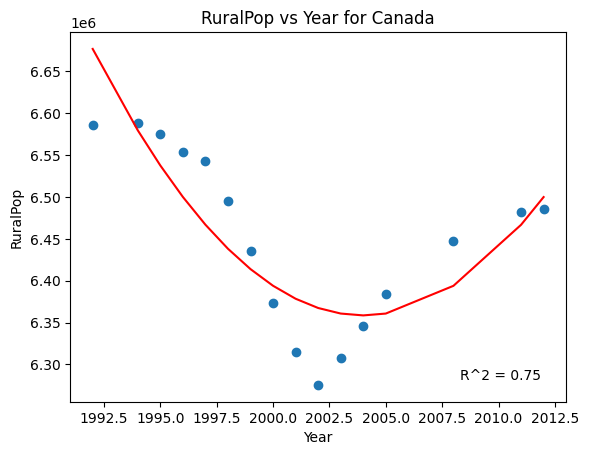

y = 8882363427.86963272 + -8858280.46322254x + 2210.14784441x^2


In [431]:
# try a quadratic regression between Year and RuralPop to see if it fits
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# quadratic regression
r2 = model.score(X_poly, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[1]:.8f}x + {model.coef_[2]:.8f}x^2'
r2_values.append([explanatory, 'Quadratic', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Exponential

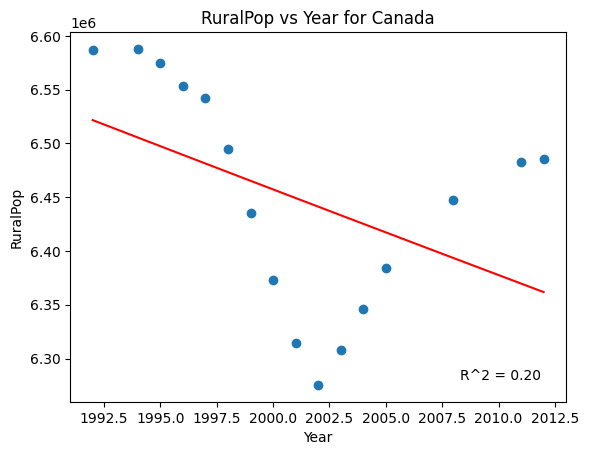

y = 77265277.26091097 * e^(-0.00124102x)


In [432]:
# try an exponential regression between Year and RuralPop to see if it
# fits
log_y = np.log(y)
model = LinearRegression().fit(X, log_y)
log_y_pred = model.predict(X)
y_pred = np.exp(log_y_pred)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# exponential regression
r2 = model.score(X, log_y)
a = np.exp(model.intercept_)
b = model.coef_[0]
equation = f'y = {a:.8f} * e^({b:.8f}x)'
r2_values.append([explanatory, 'Exponential', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

Pick which of either linear, quadratic, or exponential has the best fit.

In [433]:
# out of all the models so far, determine which fits the best and use that
# equation to predict the value of RuralPop in the given country in the
# chosen year
r2_values = sorted(r2_values, key=lambda x: x[2], reverse=True)
best_fit = r2_values[0]

# print the name of the model that fit the best, the r^2 value, and the
# equation for the model
print("Model: " + best_fit[1])
print("R^2 Value: " + str(best_fit[2]))
print("Equation: " + best_fit[3])

# get the equation from the best fit model
best_equation = best_fit[3]

Model: Quadratic
R^2 Value: 0.750432781474256
Equation: y = 8882363427.86963272 + -8858280.46322254x + 2210.14784441x^2


In [434]:
# use the equation and replace 'x' with the year to predict the explanatory
# variable
def predict_value(year, equation):
# this should work for all explanatory values

    # quadratic
    if "x^2" in equation:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        coef_x2 = float(coeffs[2].strip().split("x^2")[0])
        predicted_val = intercept + coef_x * year + coef_x2 * year**2

    # exponential
    elif "e^" in equation:
        parts = equation.split("=")
        rhs = parts[1].split("*")
        a = float(rhs[0].strip())
        b_part = rhs[1].split("e^")
        b = float(b_part[1].replace("(", "").replace(")", "").strip())
        predicted_val = a * np.exp(b * year)

    # linear
    else:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        predicted_val = intercept + coef_x * year

    return predicted_val

predicted_val = predict_value(year, best_equation)
print(f"Predicted {explanatory} for {country} in {year}: {predicted_val}")

# add the predicted value for the explanatory variable to the list as long as
# it isn't already on the list
if [country, year, explanatory, predicted_val] not in predicted:
    predicted.append([country, year, explanatory, predicted_val])

Predicted RuralPop for Canada in 2020: 6924156.490661621


## PopDensity

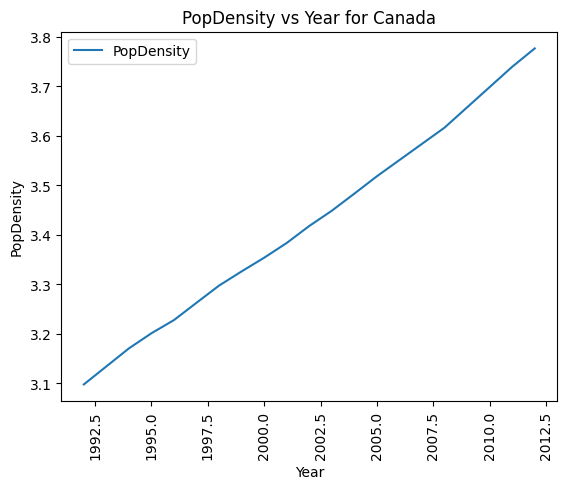

In [435]:
# create a variable for the explanatory variable we are currently modeling
explanatory = 'PopDensity'

# make a line graph of year vs TelephoneLines for the country
plt.plot(df_country['Year'], df_country[explanatory], label=explanatory)
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# create a list to store r^2 values for each type of regression as well as the
# equation given by each to see which best fits
r2_values = []

### Linear

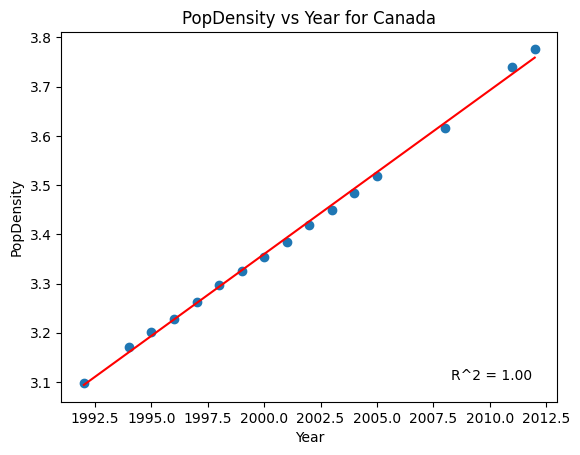

y = -63.14131559 + 0.03325063x


In [436]:
# try a linear regression between Year and PopDensity to see if it fits
from sklearn.linear_model import LinearRegression
X = df_country[['Year']]
y = df_country[explanatory]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# linear regression
r2 = model.score(X, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[0]:.8f}x'
r2_values.append([explanatory, 'Linear', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Quadratic

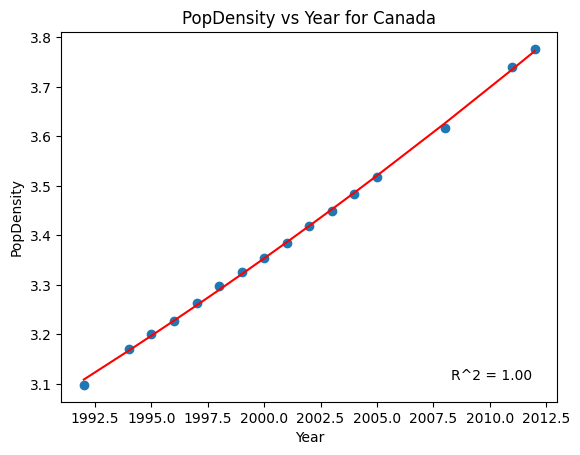

y = 795.33304705 + -0.82429665x + 0.00021415x^2


In [437]:
# try a quadratic regression between Year and PopDensity to see if it fits
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# quadratic regression
r2 = model.score(X_poly, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[1]:.8f}x + {model.coef_[2]:.8f}x^2'
r2_values.append([explanatory, 'Quadratic', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Exponential

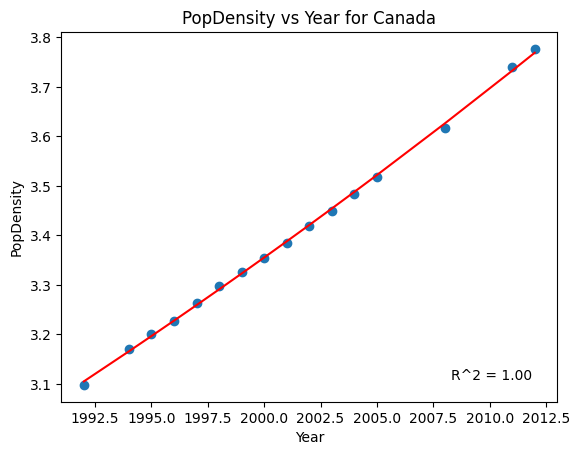

y = 0.00000001 * e^(0.00968701x)


In [438]:
# try an exponential regression between Year and PopDensity to see if it
# fits
log_y = np.log(y)
model = LinearRegression().fit(X, log_y)
log_y_pred = model.predict(X)
y_pred = np.exp(log_y_pred)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# exponential regression
r2 = model.score(X, log_y)
a = np.exp(model.intercept_)
b = model.coef_[0]
equation = f'y = {a:.8f} * e^({b:.8f}x)'
r2_values.append([explanatory, 'Exponential', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

Pick which of either linear, quadratic, or exponential has the best fit.

In [439]:
# out of all the models so far, determine which fits the best and use that
# equation to predict the value of PopDensity in the given country in the
# chosen year
r2_values = sorted(r2_values, key=lambda x: x[2], reverse=True)
best_fit = r2_values[0]

# print the name of the model that fit the best, the r^2 value, and the
# equation for the model
print("Model: " + best_fit[1])
print("R^2 Value: " + str(best_fit[2]))
print("Equation: " + best_fit[3])

# get the equation from the best fit model
best_equation = best_fit[3]

Model: Quadratic
R^2 Value: 0.9992984985384674
Equation: y = 795.33304705 + -0.82429665x + 0.00021415x^2


In [440]:
# use the equation and replace 'x' with the year to predict the explanatory
# variable
def predict_value(year, equation):
# this should work for all explanatory values

    # quadratic
    if "x^2" in equation:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        coef_x2 = float(coeffs[2].strip().split("x^2")[0])
        predicted_val = intercept + coef_x * year + coef_x2 * year**2

    # exponential
    elif "e^" in equation:
        parts = equation.split("=")
        rhs = parts[1].split("*")
        a = float(rhs[0].strip())
        b_part = rhs[1].split("e^")
        b = float(b_part[1].replace("(", "").replace(")", "").strip())
        predicted_val = a * np.exp(b * year)

    # linear
    else:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        predicted_val = intercept + coef_x * year

    return predicted_val

predicted_val = predict_value(year, best_equation)
print(f"Predicted {explanatory} for {country} in {year}: {predicted_val}")

# add the predicted value for the explanatory variable to the list as long as
# it isn't already on the list
if [country, year, explanatory, predicted_val] not in predicted:
    predicted.append([country, year, explanatory, predicted_val])

Predicted PopDensity for Canada in 2020: 4.07147405000012


## GDP

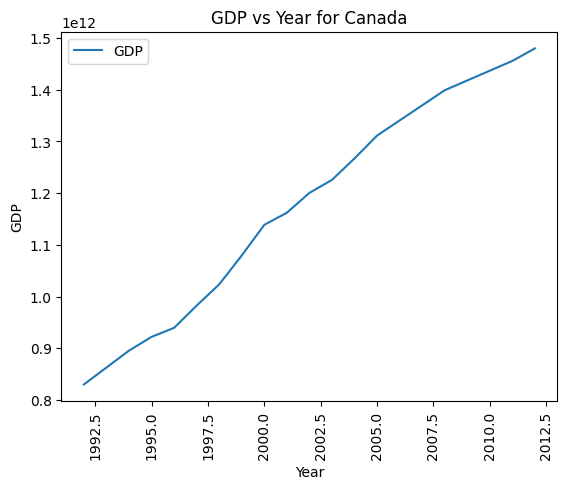

In [441]:
# create a variable for the explanatory variable we are currently modeling
explanatory = 'GDP'

# make a line graph of year vs TelephoneLines for the country
plt.plot(df_country['Year'], df_country[explanatory], label=explanatory)
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# create a list to store r^2 values for each type of regression as well as the
# equation given by each to see which best fits
r2_values = []

### Linear

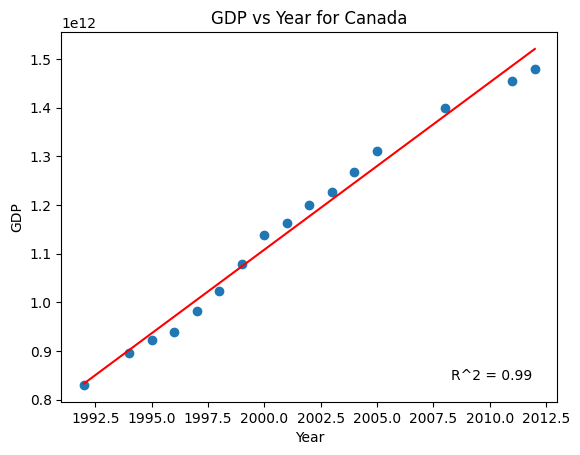

y = -67653046733653.27343750 + 34380522495.50090027x


In [442]:
# try a linear regression between Year and GDP to see if it fits
from sklearn.linear_model import LinearRegression
X = df_country[['Year']]
y = df_country[explanatory]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# linear regression
r2 = model.score(X, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[0]:.8f}x'
r2_values.append([explanatory, 'Linear', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Quadratic

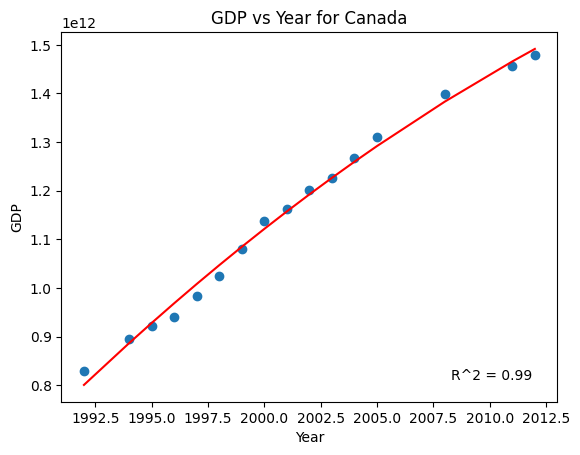

y = -1923492773729485.25000000 + 1888216086468.40600586x + -462954487.22167969x^2


In [443]:
# try a quadratic regression between Year and GDP to see if it fits
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# quadratic regression
r2 = model.score(X_poly, y)
equation = f'y = {model.intercept_:.8f} + {model.coef_[1]:.8f}x + {model.coef_[2]:.8f}x^2'
r2_values.append([explanatory, 'Quadratic', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

### Exponential

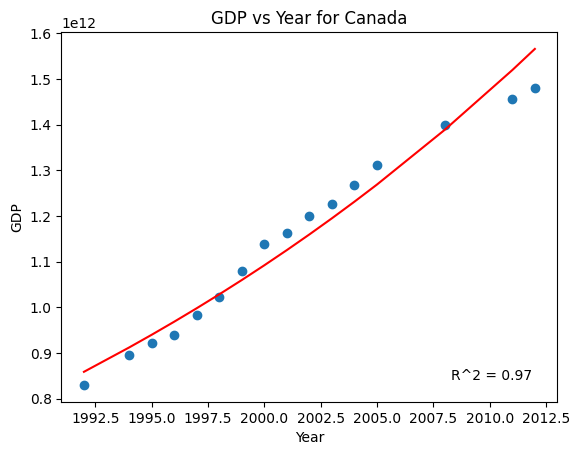

y = 0.0000000000000091 * e^(0.0300268942449399x)


In [447]:
# try an exponential regression between Year and GDP to see if it fits
log_y = np.log(y)
model = LinearRegression().fit(X, log_y)
log_y_pred = model.predict(X)
y_pred = np.exp(log_y_pred)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title(f'{explanatory} vs Year for {country}')
plt.xlabel('Year')
plt.ylabel(explanatory)

# get the r^2 value and the regression equation and add it to the list for
# exponential regression
r2 = model.score(X, log_y)
a = np.exp(model.intercept_)
b = model.coef_[0]
equation = f'y = {a:.16f} * e^({b:.16f}x)'
r2_values.append([explanatory, 'Exponential', r2, equation])

# show the r^2 value on the bottom-right of the plot
plt.text(0.95, 0.05, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

# print the regression equation for reference
print(equation)

Pick which of either linear, quadratic, or exponential has the best fit.

In [448]:
# out of all the models so far, determine which fits the best and use that
# equation to predict the value of GDP in the given country in the chosen year
r2_values = sorted(r2_values, key=lambda x: x[2], reverse=True)
best_fit = r2_values[0]

# print the name of the model that fit the best, the r^2 value, and the
# equation for the model
print("Model: " + best_fit[1])
print("R^2 Value: " + str(best_fit[2]))
print("Equation: " + best_fit[3])

# get the equation from the best fit model
best_equation = best_fit[3]

Model: Quadratic
R^2 Value: 0.9930379048382899
Equation: y = -1923492773729485.25000000 + 1888216086468.40600586x + -462954487.22167969x^2


In [449]:
# use the equation and replace 'x' with the year to predict the explanatory
# variable
def predict_value(year, equation):
# this should work for all explanatory values

    # quadratic
    if "x^2" in equation:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        coef_x2 = float(coeffs[2].strip().split("x^2")[0])
        predicted_val = intercept + coef_x * year + coef_x2 * year**2

    # exponential
    elif "e^" in equation:
        parts = equation.split("=")
        rhs = parts[1].split("*")
        a = float(rhs[0].strip())
        b_part = rhs[1].split("e^")
        b = float(b_part[1].replace("(", "").replace(")", "").strip())
        predicted_val = a * np.exp(b * year)

    # linear
    else:
        parts = equation.split("=")
        coeffs = parts[1].split("+")
        intercept = float(coeffs[0].strip())
        coef_x = float(coeffs[1].strip().split("x")[0])
        predicted_val = intercept + coef_x * year

    return predicted_val

predicted_val = predict_value(year, best_equation)
print(f"Predicted {explanatory} for {country} in {year}: {predicted_val}")

# add the predicted value for the explanatory variable to the list as long as
# it isn't already on the list
if [country, year, explanatory, predicted_val] not in predicted:
    predicted.append([country, year, explanatory, predicted_val])

Predicted GDP for Canada in 2020: 1664231277353.0


# Predict $CO_2$ Emissions Using the Prediction Model and Predicted Explanatory Variables

The last thing we need to do is get the predicted explanatory values from the list we stored them in and use those predicted values for each explanatory variable to use in the stepwise regression model we already created.

In [452]:
# print the predicted explanatory values for reference
for row in predicted:
    print(row)

['Canada', 2020, 'TelephoneLines', 10270967.129302979]
['Canada', 2020, 'AgriLand', 550975.2790621519]
['Canada', 2020, 'ArableLand', 1.0234320000001844]
['Canada', 2020, 'RuralPop', 6924156.490661621]
['Canada', 2020, 'PopDensity', 4.07147405000012]
['Canada', 2020, 'GDP', 1664231277353.0]


In [458]:
# use the stepwise regression model from earlier and each of the explanatory
# values to predict CO2Total for the given country in the future year

# recall the stepwise regression model
print(reg)

# use the model and all 6 predicted explanatory variables to predict CO2Total
# for the selected country and year
predicted_CO2 = reg.predict([[predicted[0][3], predicted[5][3], predicted[1][3], predicted[3][3], predicted[2][3], predicted[4][3]]])

print(f"Predicted CO2Total for {country} in {year}: {predicted_CO2} kilotons")

LinearRegression()
Predicted CO2Total for Canada in 2020: [469.31095511] kilotons


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [459]:
# make a copy of the country dataframe that we can use to add predicted
# CO2 values
df_country_copy = df_country.copy()

# add a row to the copy with the desired future year, all 6 explanatory
# variables, and the predicted CO2Total
df_country_copy.loc[len(df_country_copy)] = [year, predicted[0][3], predicted[1][3], predicted[2][3], predicted[3][3], predicted[4][3], predicted[5][3], predicted_CO2]

df_country_copy

,Year,TelephoneLines,AgriLand,ArableLand,RuralPop,PopDensity,GDP,CO2Total
0,1992,1.581493e+07,677530.000000,1.617582,6.586539e+06,3.097999,8.301330e+11,463.521
1,1994,1.671680e+07,678740.000000,1.579869,6.587858e+06,3.170768,8.955100e+11,478.267
2,1995,1.725041e+07,679340.000000,1.564480,6.575215e+06,3.201394,9.220930e+11,490.951
3,1996,1.756700e+07,679940.000000,1.551305,6.553280e+06,3.228016,9.396040e+11,507.0
4,1997,1.797400e+07,680550.000000,1.534415,6.542357e+06,3.262975,9.825810e+11,521.278
5,1998,1.866000e+07,679440.000000,1.520615,6.495228e+06,3.297649,1.023600e+12,528.987
6,1999,1.929400e+07,678340.000000,1.509824,6.435543e+06,3.326317,1.079500e+12,543.73
7,2000,2.038000e+07,677230.000000,1.499679,6.373418e+06,3.353952,1.138680e+12,566.552
8,2001,2.084000e+07,676130.000000,1.488802,6.314558e+06,3.383699,1.162070e+12,559.042
9,2002,2.112600e+07,675020.000000,1.476100,6.275436e+06,3.418031,1.200470e+12,564.669


Finally, we will recreate the line chart to see how the predicted CO2Total value matches up with the rest of the data.

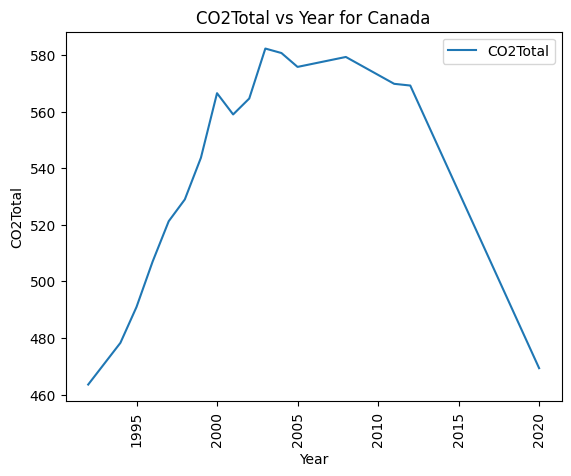

In [460]:
# create a line chart of year vs CO2Total from df_country_copy
plt.plot(df_country_copy['Year'], df_country_copy['CO2Total'], label='CO2Total')
plt.title(f'CO2Total vs Year for {country}')
plt.xlabel('Year')
plt.ylabel('CO2Total')
plt.legend()
plt.xticks(rotation=90)
plt.show()

The country and year can be changed as mentioned above, but I ran the model for Canada in 2020 (which is a future year since the data we have only goes until about 2015). Since 2020 is in the somewhat distant future, we had to extrapolate each explanatory variable, which leads to the predicted $CO_2$ emissions for Canada in 2020 to be as low as they are.

Canada's emissions were already starting to increase less rapidly and even began to decrease by the last few years included in our dataset, so it makes sense for the model to predict a much lower value for emissions in 2020.